#### Zahra Hashemi - 0231846534

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.metrics import mean_squared_error

In [141]:
import warnings
warnings.filterwarnings('ignore')

## [New Series]

### Data Loading

The chosen original data was [Job Vacancy Rate, Euro area 20 (fixed composition) as of 1 January 2023, Quarterly](https://data.ecb.europa.eu/data/datasets/JVS/JVS.Q.I9._Z.N.JVR.P._T._T) in the field of **Education**.

In [142]:
# load original data
df_original = pd.read_csv('HWIII_original_data_Hashemi.csv')
df_original.columns = ['date', 'time-period', 'job-vacancy-rate']
df_original.head()

,date,time-period,job-vacancy-rate
0,2010-12-31,2010Q4,0.8
1,2011-03-31,2011Q1,0.8
2,2011-06-30,2011Q2,1.0
3,2011-09-30,2011Q3,1.1
4,2011-12-31,2011Q4,0.7


Now, for additional data, I chose [Job vacancy rate, Euro area 20 (fixed composition) as of 1 January 2023, Quarterly](https://data.ecb.europa.eu/data/datasets/JVS/JVS.Q.I9._Z.N.JVR.K._T._T) in the field of **Financial and insurance activities**

In [143]:
# load additional data
df_additional = pd.read_csv('HWIII_additional_data_Hashemi.csv')
df_additional.columns = ['date', 'time-period', 'job-vacancy-rate']
df_additional.head()

,date,time-period,job-vacancy-rate
0,2010-12-31,2010Q4,1.3
1,2011-03-31,2011Q1,1.2
2,2011-06-30,2011Q2,1.1
3,2011-09-30,2011Q3,1.0
4,2011-12-31,2011Q4,1.2


### Plotting the Data

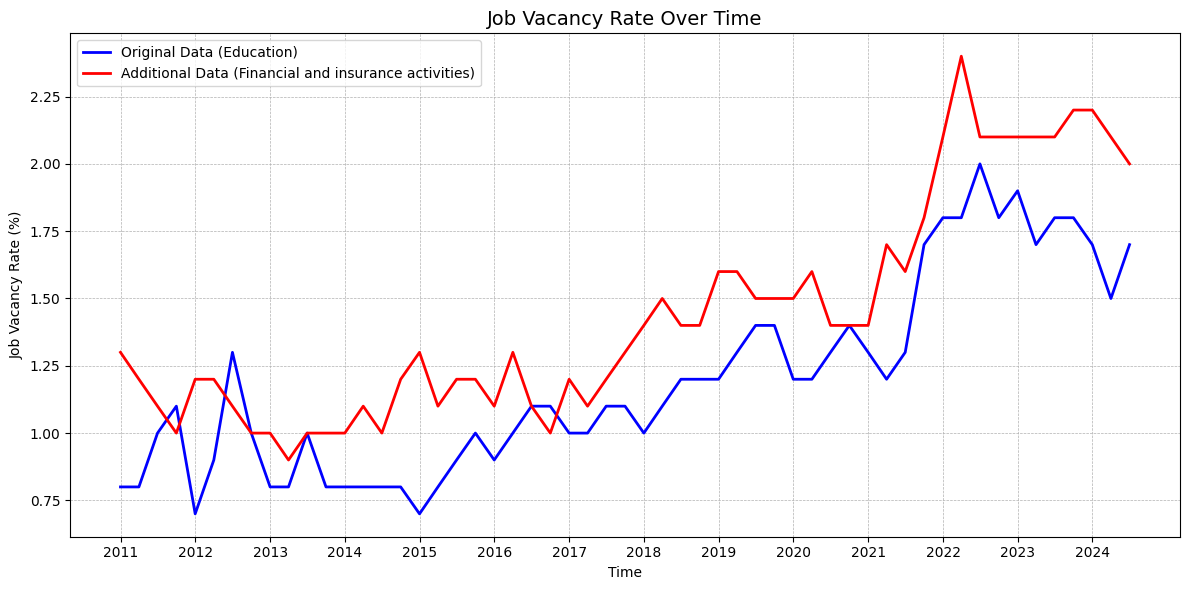

In [144]:
df_original['date'] = pd.to_datetime(df_original['date'])
df_additional['date'] = pd.to_datetime(df_additional['date'])
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_original['date'], df_original['job-vacancy-rate'], color='blue', linewidth=2)
ax.plot(df_additional['date'], df_additional['job-vacancy-rate'], color='red', linewidth=2)
ax.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
ax.set_xlabel('Time', fontsize=10)
ax.set_ylabel('Job Vacancy Rate (%)', fontsize=10)
ax.set_title('Job Vacancy Rate Over Time', fontsize=14)
ax.legend(['Original Data (Education)', 'Additional Data (Financial and insurance activities)'], fontsize=10)

# Formatting the x-axis
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y"))
ax.set_xticks(pd.date_range(start=df_original['date'].min(), end=df_original['date'].max(), freq='YS'))

plt.tight_layout()
plt.show()

### Is the data stationary?

In [145]:
def autocorrelation_plots(df):
    fig, axs = plt.subplots(1, 3,figsize=(16,8))
    axs[0].plot(df['job-vacancy-rate'])
    axs[0].set_xticks(np.arange(0,len(df['job-vacancy-rate']),10))                                                       # display every 10-th tick
    axs[0].set_xticklabels(df.date[np.arange(0,len(df['job-vacancy-rate']),10)],rotation=20)                             # label ticks
    axs[0].set_xlabel('Time', fontsize=10)
    axs[0].set_ylabel('Job Vacancy Rate (%)', fontsize=10)

    sm.graphics.tsa.plot_acf(df['job-vacancy-rate'], lags=10, ax=axs[1])
    axs[1].set_xlabel('Lag', fontsize=10)
    axs[1].set_ylabel('ACF', fontsize=10)

    sm.graphics.tsa.plot_pacf(df['job-vacancy-rate'], lags=10, ax=axs[2])
    axs[2].set_xlabel('Lag', fontsize=10)
    axs[2].set_ylabel('PACF', fontsize=10)

    plt.tight_layout()
    plt.show()

In [146]:
def data_being_stationary(df, col_name='job-vacancy-rate'):
    ADF_test_res = sm.tsa.adfuller(df[col_name], maxlag=None, regression='ct', autolag='AIC')
    print("Regarding p-value:")
    if ADF_test_res[1] <= 0.05:
        print("Reject the null hypothesis - Data is stationary")
    else:
        print("Can not reject the null hypothesis - Data is non-stationary")

#### Original data

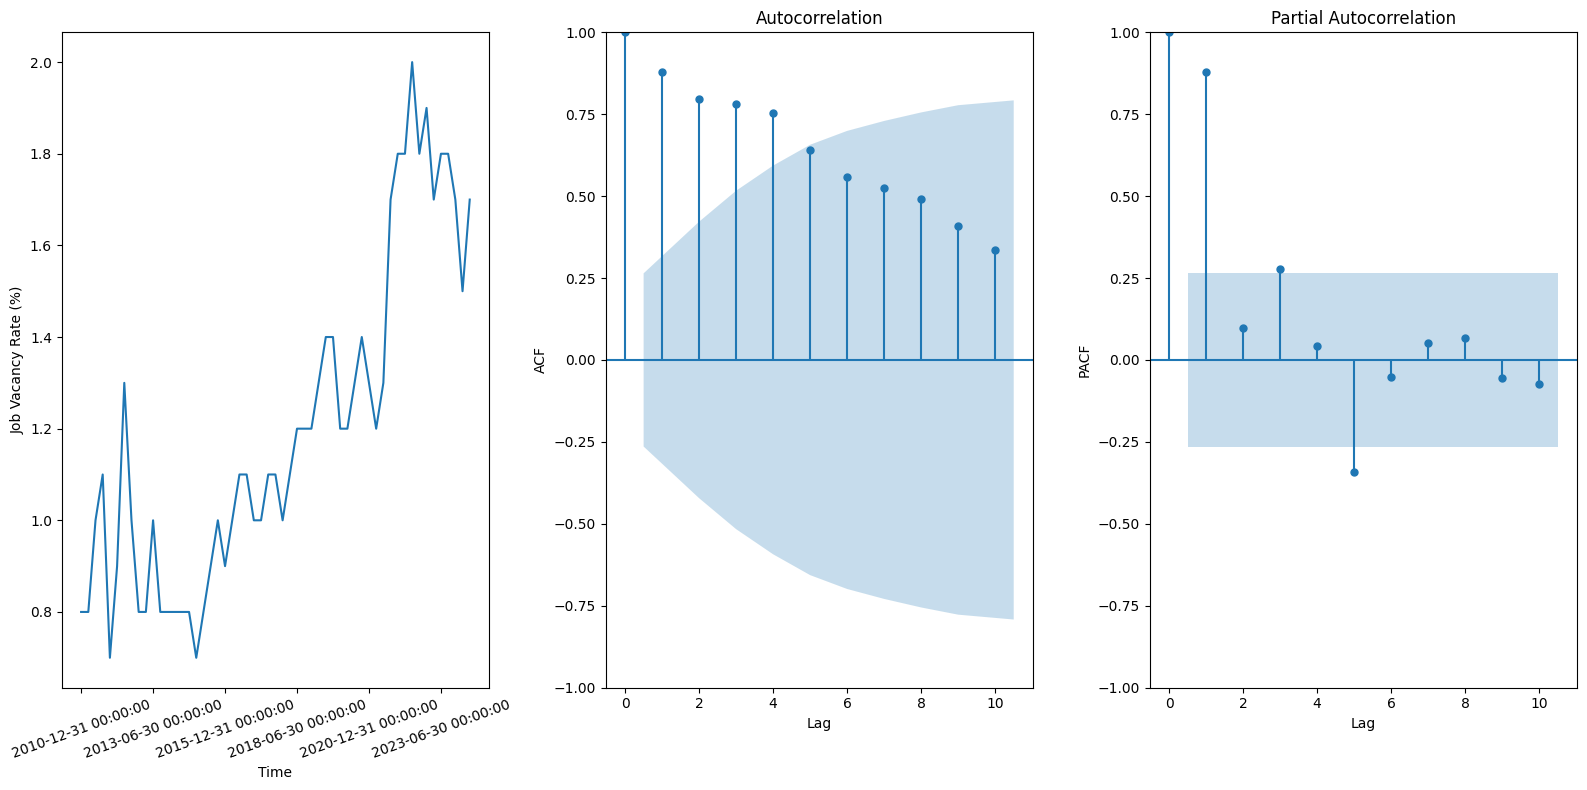

In [147]:
autocorrelation_plots(df_original)

In [148]:
data_being_stationary(df_original)

Regarding p-value:
Can not reject the null hypothesis - Data is non-stationary


#### Additional data

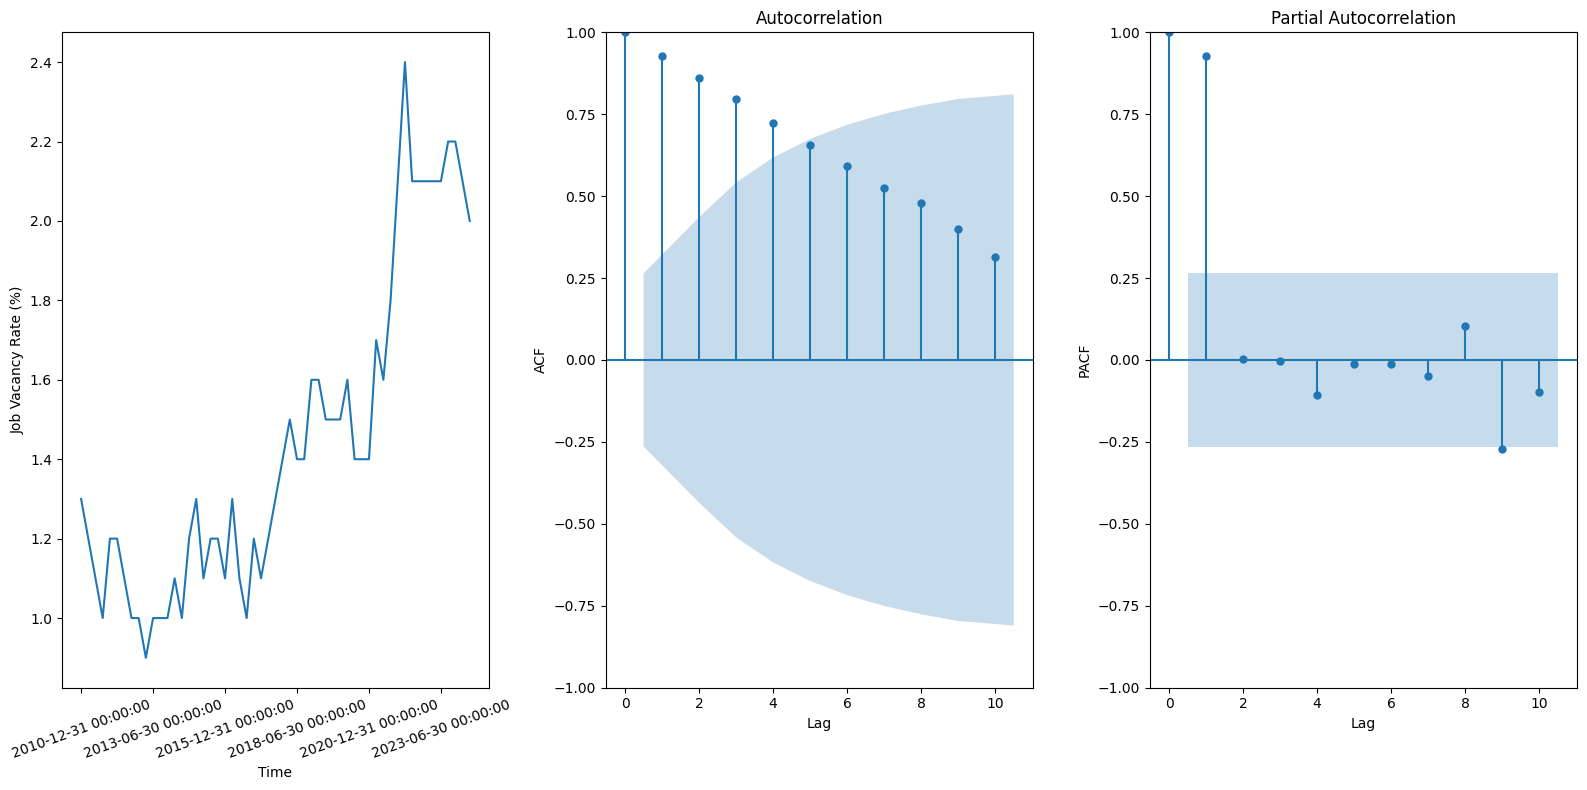

In [149]:
autocorrelation_plots(df_additional)

In [150]:
data_being_stationary(df_additional)

Regarding p-value:
Can not reject the null hypothesis - Data is non-stationary


Both data are non-stationary. So first of all, we need to make them stationary. Here we use the first order differencing method to make the data stationary.

In [151]:
def coverting_to_stationary(df):
    '''
        Plot first differences of the series and AC& PAC

        pct_change()
        Computes the fractional change from the immediately previous row by default. 
        This is useful in comparing the fraction of change in a time series of elements.
    '''
    df_diff = pd.DataFrame()
    
    df_diff['dy'] = df['job-vacancy-rate'].pct_change()
    df_diff['date'] = pd.to_datetime(df['date']).dt.date
    df_diff = df_diff.dropna()

    fig, axs = plt.subplots(1, 3,figsize=(16,8))
    axs[0].plot(df_diff['dy'])
    axs[0].set_xticks(np.arange(0,len(df_diff['dy']),10))                                                       # display every 10-th tick
    axs[0].set_xticklabels(df_diff.date[np.arange(1,len(df_diff['dy'])+1,10)],rotation=20)                            # label ticks
    axs[0].set_xlabel('Time', fontsize=10)
    axs[0].set_ylabel('Job Vacancy Rate Difference(%)', fontsize=10)

    sm.graphics.tsa.plot_acf(df_diff['dy'], lags=10, ax=axs[1])
    axs[1].set_xlabel('Lag', fontsize=10)
    axs[1].set_ylabel('ACF', fontsize=10)

    sm.graphics.tsa.plot_pacf(df_diff['dy'], lags=10, ax=axs[2])
    axs[2].set_xlabel('Lag', fontsize=10)
    axs[2].set_ylabel('PACF', fontsize=10)

    plt.tight_layout()
    plt.show()
    
    return df_diff

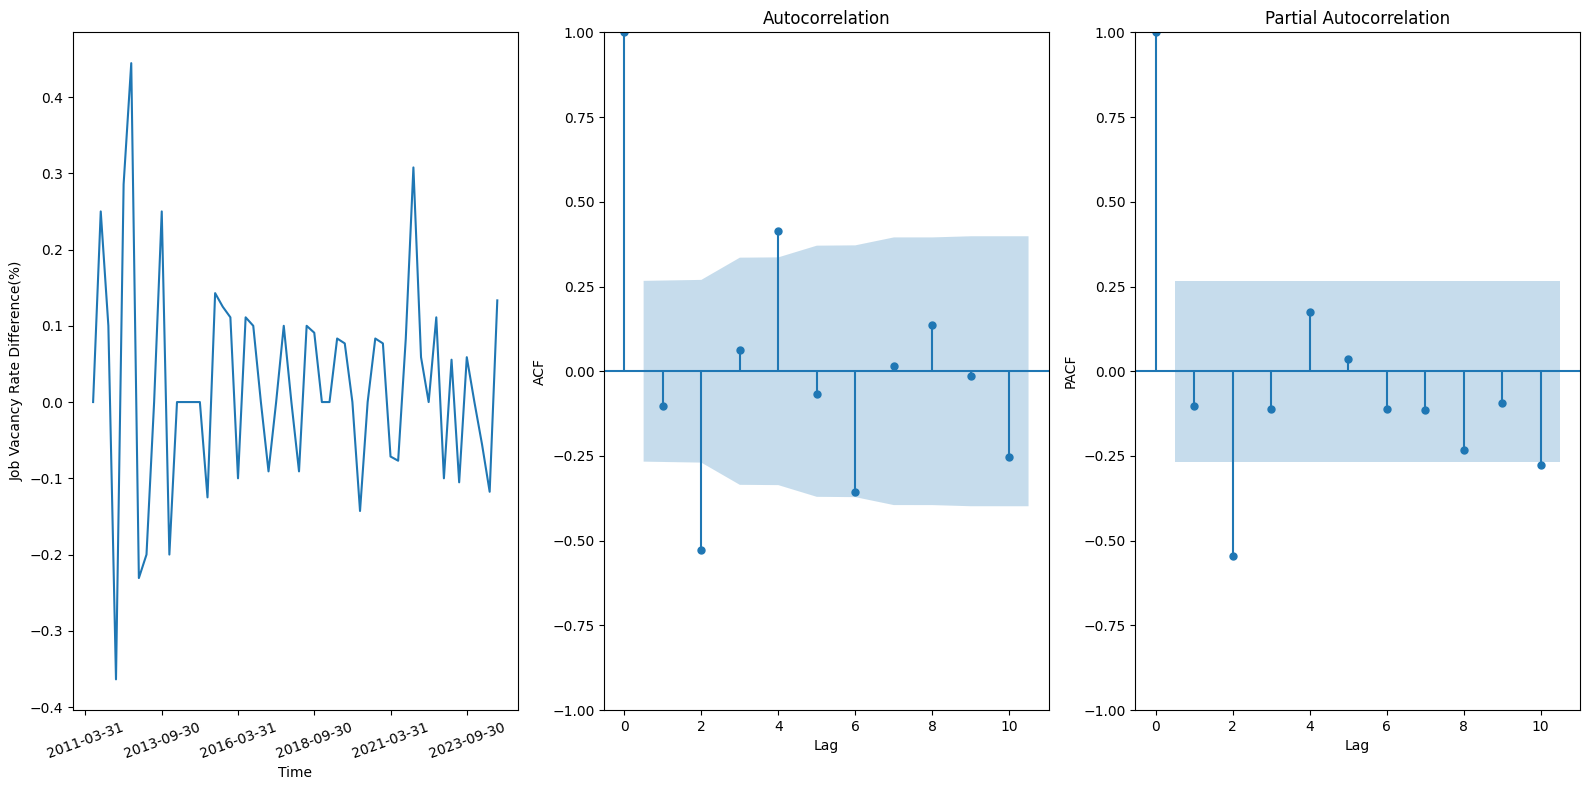

Regarding p-value:
Reject the null hypothesis - Data is stationary


In [152]:
df_original_diff = coverting_to_stationary(df_original)
data_being_stationary(df_original_diff, col_name='dy')

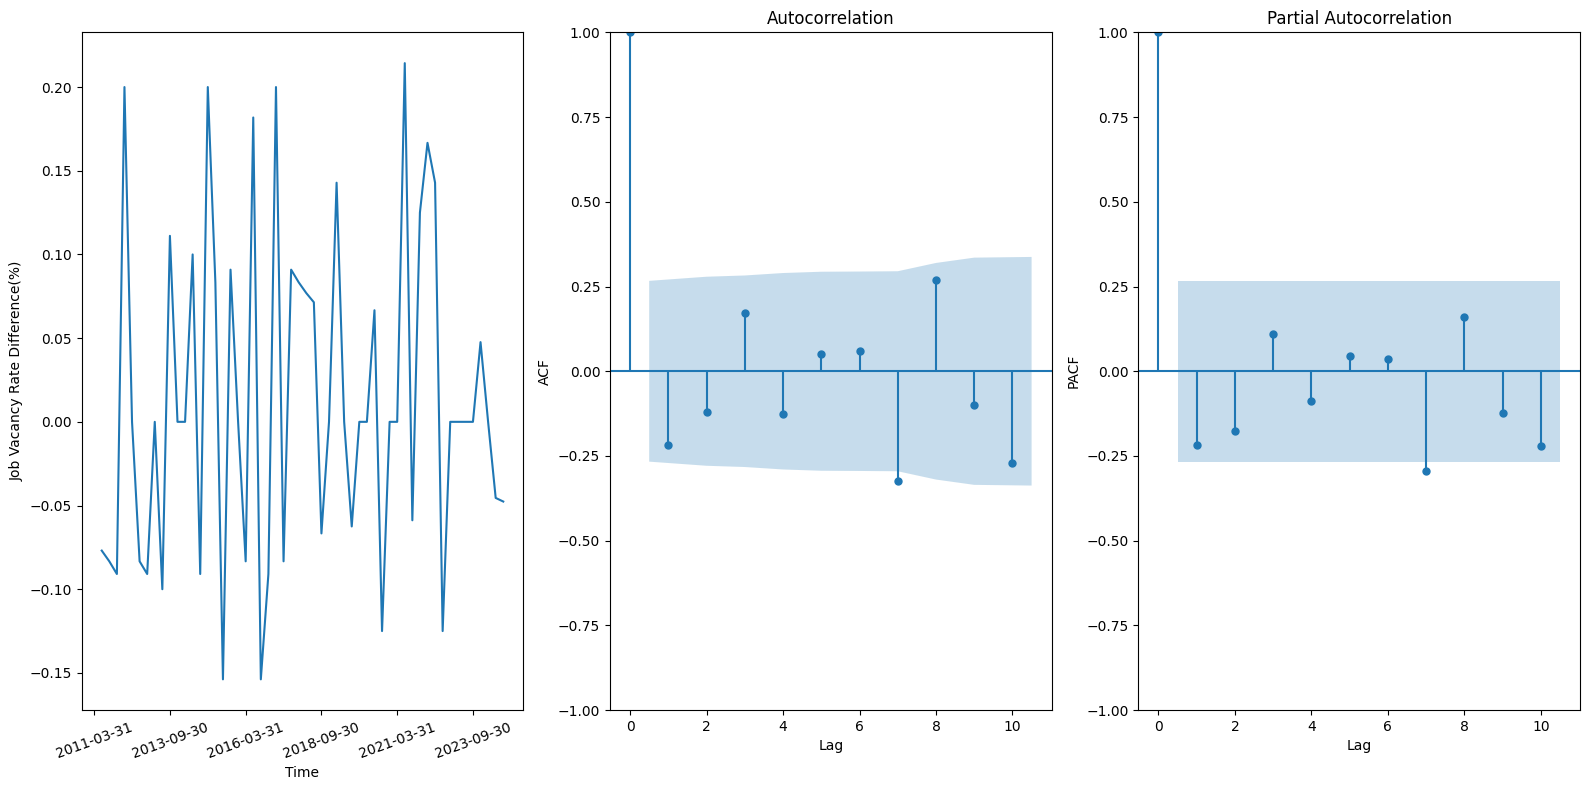

Regarding p-value:
Reject the null hypothesis - Data is stationary


In [153]:
df_additional_diff = coverting_to_stationary(df_additional)
data_being_stationary(df_additional_diff, col_name='dy')

## [VAR estimation]

You can see that there is not a good correlation between the two stationary (after transformation) data. However, the original data (non-stationary) have a good correlation.

In [154]:
print("Pearson correlation coefficient between original and additional data (stationary): ", stats.pearsonr(df_original_diff['dy'], df_additional_diff['dy'])[0])
print("Pearson correlation coefficient between original and additional data (non-stationary): ", stats.pearsonr(df_original['job-vacancy-rate'], df_additional['job-vacancy-rate'])[0])

Pearson correlation coefficient between original and additional data (stationary):  -0.18267634459667323
Pearson correlation coefficient between original and additional data (non-stationary):  0.895498038755498


In [155]:
merged_df = pd.merge(df_original_diff, df_additional_diff, on='date', how='inner', suffixes=('_edu', '_fin'))
merged_df.set_index('date', inplace=True)
merged_df.head(10)

,dy_edu,dy_fin
date,,
2011-03-31,0.000000,-0.076923
2011-06-30,0.250000,-0.083333
2011-09-30,0.100000,-0.090909
2011-12-31,-0.363636,0.200000
2012-03-31,0.285714,0.000000
2012-06-30,0.444444,-0.083333
2012-09-30,-0.230769,-0.090909
2012-12-31,-0.200000,0.000000
2013-03-31,0.000000,-0.100000


In [156]:
train_size = int(len(merged_df) * 0.8)
train_data, test_data = merged_df.iloc[:train_size], merged_df.iloc[train_size:]

model = sm.tsa.VAR(train_data)
res = sm.tsa.VAR.select_order(model,10)
res.summary()

,AIC,BIC,FPE,HQIC
0,-9.090,-8.999,0.0001128,-9.060
1,-9.150,-8.878,0.0001063,-9.059
2,-9.478,-9.024*,7.688e-05,-9.325*
3,-9.442,-8.808,8.033e-05,-9.229
4,-9.507*,-8.691,7.646e-05*,-9.232
5,-9.313,-8.315,9.514e-05,-8.977
6,-9.292,-8.113,0.0001008,-8.895
7,-9.309,-7.948,0.0001046,-8.851
8,-9.454,-7.912,9.752e-05,-8.935
9,-9.279,-7.556,0.0001287,-8.700


Here, from the result's summary, we need to choose the best lag order which is the minumum in each column. Here, we consider the optimal orders from bic and aic criteria.

In [157]:
optimal_lag_order_bic = res.selected_orders['bic']
print("Optimal lag order according to BIC: ", optimal_lag_order_bic)
optimal_lag_order_aic = res.selected_orders['aic']
print("Optimal lag order according to AIC: ", optimal_lag_order_aic)

Optimal lag order according to BIC:  2
Optimal lag order according to AIC:  4


## [VAR forecasts]

In [158]:
predictions = []

for i in range(len(test_data)):
    model = sm.tsa.VAR(train_data)
    fitted_model = model.fit(optimal_lag_order_bic)
    
    forecast = fitted_model.forecast(train_data.values, steps=1)      # one-step-ahead forecast
    predictions.append(forecast)

    train_data = pd.concat([train_data, test_data.iloc[[i]]])

predictions = np.array([pred[0] for pred in predictions])
assert predictions.shape == test_data.values.shape, "Shapes of predictions and test data do not match."
rmse = np.sqrt(mean_squared_error(test_data.values, predictions, multioutput='raw_values'))
print("RMSE for each column ['dy_edu', 'dy_fin']: ", rmse)


RMSE for each column ['dy_edu', 'dy_fin']:  [0.1179126  0.10931488]


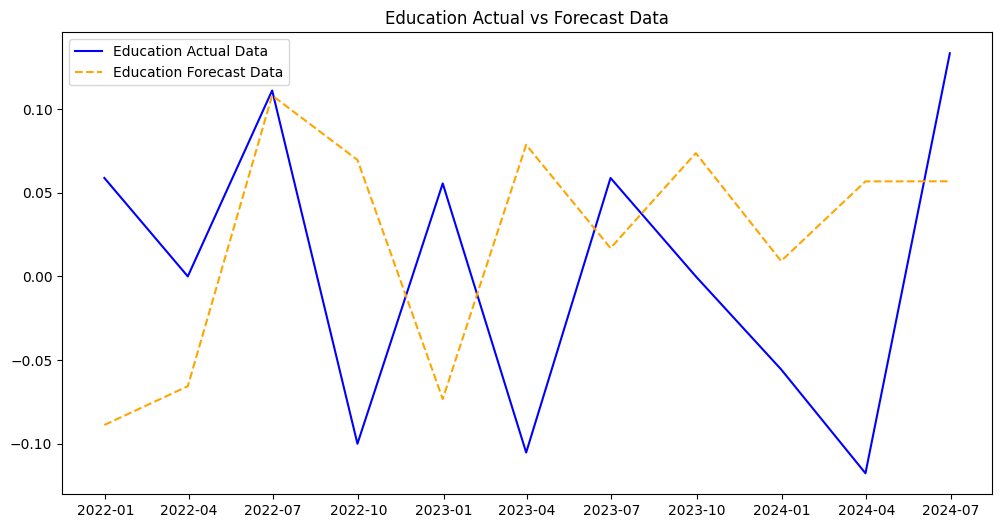

In [159]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['dy_edu'], label='Education Actual Data', color='blue')
plt.plot(test_data.index, predictions[:, 0], label='Education Forecast Data', color='orange', linestyle='dashed')
plt.title('Education Actual vs Forecast Data')
plt.legend()
plt.show()  

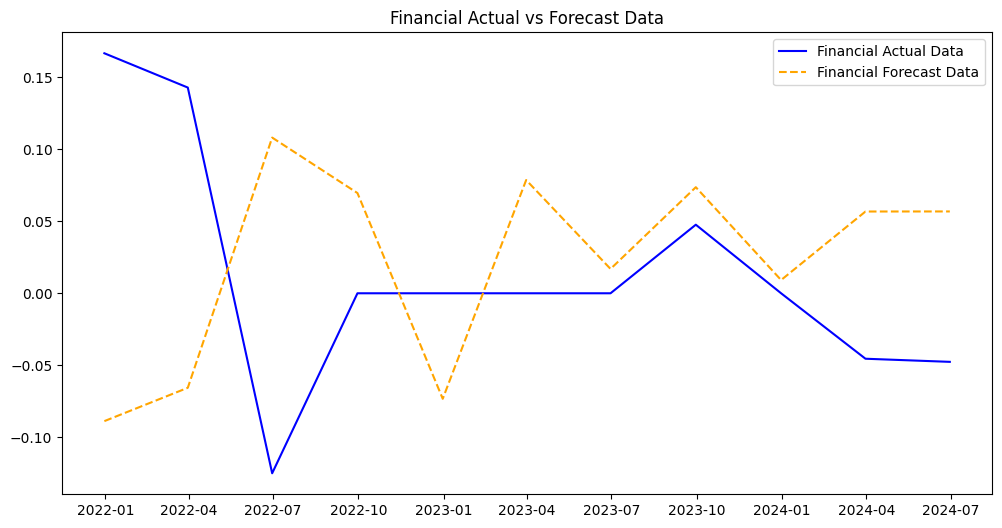

In [160]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['dy_fin'], label='Financial Actual Data', color='blue')
plt.plot(test_data.index, predictions[:, 0], label='Financial Forecast Data', color='orange', linestyle='dashed')
plt.title('Financial Actual vs Forecast Data')
plt.legend()
plt.show()  

## [BONUS]

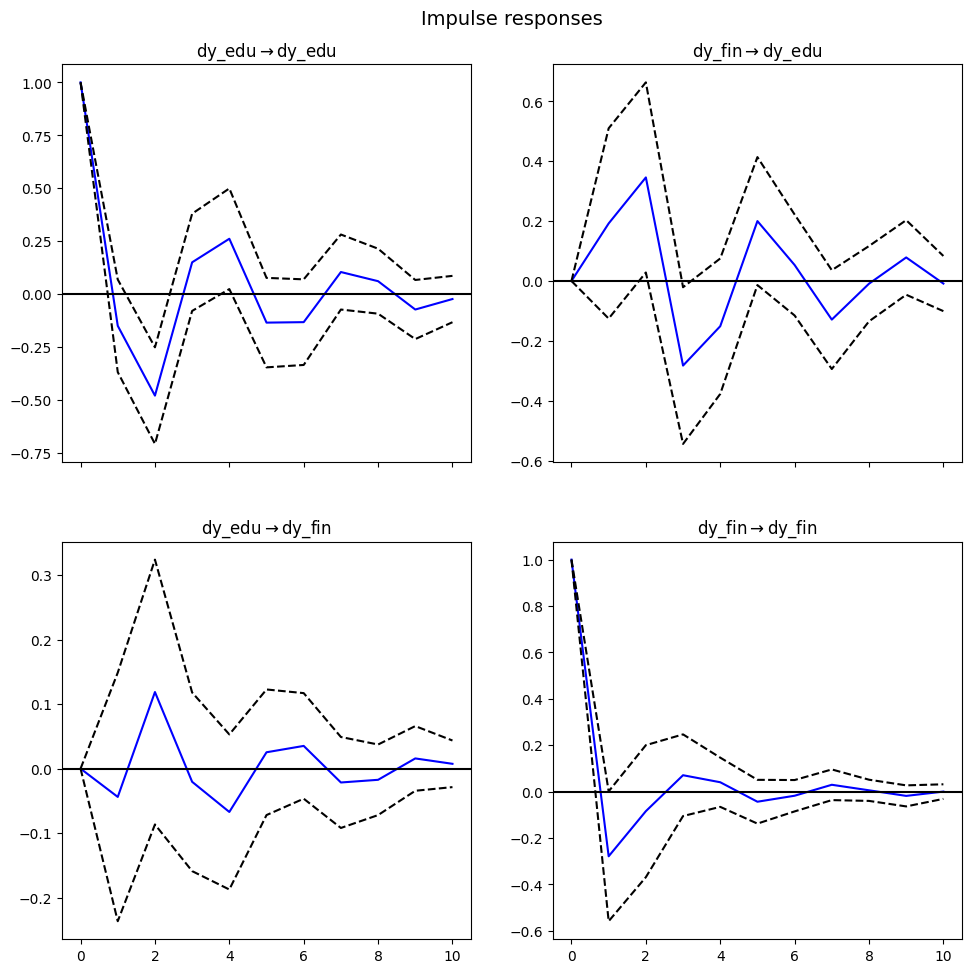

In [161]:
model = sm.tsa.VAR(train_data)
fitted_model = model.fit(optimal_lag_order_bic)  

irf = fitted_model.irf(10)  

irf.plot(orth=False) 
plt.show()

The IRF plot shows how each variable (Education data and Finance data) in the VAR model responds over time to a shock created by each of the variables.

The shocks to the education data, as you can see, are fluctuating too much, hardly converging to zero, however, the shocks to the finance data are converging to zero easier, and the intensity of fluctuations are less. 